In [2]:
from lxml import etree


In [3]:
# xml parser object
doc = etree.iterparse('2012\TestbedSunJun13Flows.xml',  events=('start',), tag='TestbedSunJun13Flows' )
print(doc)

In [3]:
# Appending header row into csv file
with open('flowSunJun115.csv', 'a') as f: #Write CSV File
    header = 'appName,source,protocolName,sourcePort,destination,destinationPort,direction,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,sourceTCPFlagsDescription,destinationTCPFlagsDescription,startDateTime,stopDateTime,Tag'
    f.writelines(header+"\n")

def write_as_csv(row):
    """ 
        write dictionary into csv
    """
    r = ' , '.join(list(row.values()))
    
    with open('flowSunJun115.csv', 'a') as f:
        f.writelines(r+"\n")
    print(r)

csv = []
def extract_row(dom):
    tags = {
          'appName' : '',
          'source': '', 
          'protocolName': '', 
          'sourcePort': '', 
          'destination': '',
          'destinationPort': '',
          'direction': '',
          'totalSourceBytes': '',
          'totalDestinationBytes': '',
          'totalDestinationPackets': '',
          'totalSourcePackets': '',
          'sourcePayloadAsBase64': '',
          'sourcePayloadAsUTF': '',
          'destinationPayloadAsBase64': '',
          'destinationPayloadAsUTF': '',
          'sourceTCPFlagsDescription': '',
          'destinationTCPFlagsDescription': '',          
          'startDateTime': '', 
          'stopDateTime': '', 
          'Tag': '' 
  }

    # for each object in xml
    # assign each value to it's
    # tag in above defined tag's 
    # dictionary
    for d in dom:
        if not d.text or d.text == None:
        tags[d.tag] = '0'

    elif ',' in d.text:
        tags[d.tag] = ' '.join(d.text.split(','))
    else:
        tags[d.tag] = d.text

    write_as_csv(tags)
    return tags  



In [4]:


for event, element in doc:
  children = element.getchildren()
  extract_row(children)
#   print(children)----------------------------- END OF PARSER 
  

## END OF PARSER  -------------------------------------------------------- END OF PARSER

In [30]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 94AA-B21E

 Directory of C:\Users\mubar\Downloads\New folder (3)

21/06/2021  05:40 pm    <DIR>          .
21/06/2021  05:40 pm    <DIR>          ..
21/06/2021  05:04 pm    <DIR>          .ipynb_checkpoints
21/06/2021  06:16 am       816,271,774 13j.csv
21/06/2021  03:05 pm    <DIR>          2012
21/06/2021  05:41 pm        85,440,116 flowSunJun13.csv
21/06/2021  04:42 am    <DIR>          SplitCap_2-1
21/06/2021  04:35 am           158,750 SplitCap_2-1.zip
21/06/2021  05:40 pm        82,610,062 Untitled.ipynb
               4 File(s)    984,480,702 bytes
               5 Dir(s)  586,071,846,912 bytes free


In [23]:
import pandas as pd
url = 'flowSunJun1.csv'
df = pd.read_csv(url)


In [34]:
df[' Tag']
df.shape
# df1 =  df.drop([' Tag'], axis = 1)
# df1 = df

(275528, 20)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
matrix_input = tfidf.fit_transform(df1)

In [26]:
matrix_input

<20x20 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
print(km)


KMeans(n_clusters=3)


In [28]:
km.fit(matrix_input)

KMeans(n_clusters=3)

In [29]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0])

In [8]:
df1.columns

Index(['appName', ' source', ' protocolName', ' sourcePort', ' destination',
       ' destinationPort', ' direction ', 'totalSourceBytes ',
       'totalDestinationBytes ', 'totalDestinationPackets',
       ' totalSourcePackets', ' sourcePayloadAsBase64', ' sourcePayloadAsUTF',
       ' destinationPayloadAsBase64', ' destinationPayloadAsUTF',
       ' sourceTCPFlagsDescription', ' destinationTCPFlagsDescription',
       ' startDateTime ', 'stopDateTime', ' Tag'],
      dtype='object')

In [30]:
df1.values

array([['appName', ' source', ' protocolName', ..., ' startDateTime ',
        'stopDateTime', ' Tag'],
       ['Unknown_UDP ', ' 192.168.5.122 ', ' udp_ip ', ...,
        ' 2010-06-12T23:57:24 ', ' 2010-06-13T09:24:52 ', ' Normal'],
       ['HTTPWeb ', ' 192.168.2.113 ', ' tcp_ip ', ...,
        ' 2010-06-12T23:57:38 ', ' 2010-06-12T23:59:20 ', ' Normal'],
       ...,
       ['HTTPWeb ', ' 192.168.2.111 ', ' tcp_ip ', ...,
        ' 2010-06-13T23:58:53 ', ' 2010-06-13T23:58:55 ', ' Normal'],
       ['POP ', ' 192.168.4.120 ', ' tcp_ip ', ...,
        ' 2010-06-13T23:58:57 ', ' 2010-06-13T23:58:57 ', ' Normal'],
       ['POP ', ' 192.168.4.120 ', ' tcp_ip ', ...,
        ' 2010-06-13T23:58:57 ', ' 2010-06-13T23:58:57 ', ' Normal']],
      dtype=object)

In [31]:
kyun = df1[' Tag']
kyun.value_counts()


 Normal    247138
 Attack     19787
             8546
 NaN           56
 Tag            1
Name:  Tag, dtype: int64

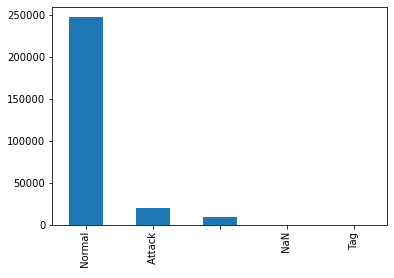

In [10]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
kyun.value_counts().plot(kind='bar')
plt.show()

In [2]:
kyun = df1[' Tag']
kyun.value_counts()

NameError: name 'df1' is not defined

In [159]:
# Attack_count = kyun.value_counts()[1]
# Benign_count = kyun.value_counts()[0]
# Attack_proba = ((Attack_count / (Attack_count + Benign_account)) )
# # help(kyun)

# print(Attack_count ,'/', Attack_count + Benign_count, Attack_count , Benign_count )
# print(Attack_proba)

19787 / 266925 19787 247138
0.07412943710780182


In [1]:
/

(275528, 20)

In [2]:
kyun = df5['Tag']
kyun.value_counts()
Attack_count = kyun.value_counts()[1]
Benign_count = kyun.value_counts()[0]
Attack_proba = ((Attack_count / (Attack_count + Benign_count)) )
# help(kyun)

print(Attack_count ,'/', Attack_count + Benign_count, Attack_count , Benign_count )
print(Attack_proba)

19787 / 266926 19787 247139
0.0741291593924908


In [3]:
# help(hi)

In [4]:
# i = df5[((df5.Tag == ''))].index
# df.loc[df['column_name'] == some_value]
# df5.loc[df5['Tag'] != 'Attack']
# i = df5.loc[df5['Tag'] == 'NaN']
# i = df[((df.Name == 'jhon') &( df.Age == 15) & (df.Grade == 'A'))].index
i = df5[((df5.Tag == 'NaN'))].index

df5.head()
df5.shape

# df5['Tag'].values()

(275528, 20)

In [5]:
i = df5.loc[df5['Tag'].isin([' ','NaN'])].index
print( type(i))

l = []
for j in i:
#     print(type(j))
    l.append(j)
print(l)


In [44]:
# df5.drop
df5 = df5.drop(columns=['appName','direction','startDateTime','stopDateTime'])
# df.drop(columns=['B', 'C'])



df5.shape


KeyError: "['appName' 'direction' 'startDateTime' 'stopDateTime'] not found in axis"

In [16]:
kyun = df5['Tag']
kyun.value_counts()

 Normal    247139
 Attack     19787
 NaN           56
Name: Tag, dtype: int64

In [13]:
df5.head(30)
# df5.shape

,source,protocolName,sourcePort,destination,destinationPort,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourceTCPFlagsDescription,destinationTCPFlagsDescription,Tag
0,192.168.5.122,udp_ip,5353,224.0.0.251,5353,2633658,0,0,28971,N/A,N/A,Normal
1,192.168.5.122,udp_ip,5353,224.0.0.251,5353,2633658,0,0,28971,N/A,N/A,Normal
2,192.168.2.113,tcp_ip,4191,192.168.5.122,80,64,128,2,1,F A,R,Normal
3,192.168.2.113,tcp_ip,4191,192.168.5.122,80,64,128,2,1,F A,R,Normal
4,192.168.2.113,tcp_ip,4192,207.241.148.80,80,128,64,1,2,F A,F A,Normal
5,192.168.2.113,tcp_ip,4192,207.241.148.80,80,128,64,1,2,F A,F A,Normal
6,192.168.2.110,tcp_ip,1864,216.49.88.12,80,128,128,2,2,F A,F A,Normal
7,192.168.2.110,tcp_ip,1864,216.49.88.12,80,128,128,2,2,F A,F A,Normal
8,192.168.2.113,tcp_ip,4186,63.245.209.72,443,64,0,0,1,F A,NaN,Normal
9,192.168.2.113,tcp_ip,4186,63.245.209.72,443,64,0,0,1,F A,NaN,Normal


In [25]:
import matplotlib 
import matplotlib.pyplot as plt


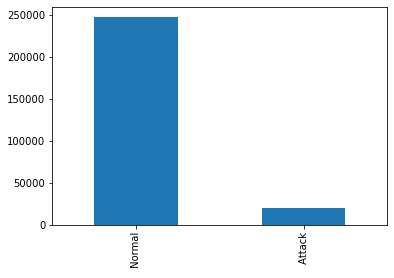

In [24]:
i = df5.loc[df5['Tag'].isin([' NaN'])].index
# type(kyun.value_counts()[2])
ll = []
for j in i:
    df5 = df5.drop(j)

    
%matplotlib inline
kyun = df5['Tag']
kyun.value_counts().plot(kind='bar')
plt.show()  

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
# df.drop(columns=['B', 'C'])
# print(df5)
# df5 = df5.drop(columns=['Tag']) 
matrix_input = tfidf.fit_transform(df5)
matrix_input

<11x11 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10)
print(km)
km.fit(matrix_input)
km.labels_

KMeans(n_clusters=10)


array([5, 1, 0, 3, 7, 9, 4, 2, 6, 8, 0])

In [5]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
#Load Data
# url = 'flowSunJun1.csv'
# df = pd.read_csv(url)
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape